In [1]:
from superfv import AdvectionSolver, EulerSolver, initial_conditions
from functools import partial
import numpy as np
import matplotlib.pyplot as plt

In [2]:
solver = AdvectionSolver(
    ic=partial(initial_conditions.square, vx=1),
    nx=64,
    p=2,
    ZS=True,
    PAD={"rho": (0, 1)},
)
solver.run(1.0)

{'rho', 'vx'} 2
{'vy', 'vz'} 2
{'rho', 'vz', 'vx', 'vy'} 4


100%|██████████| 1.0/1.0 [00:00]                 


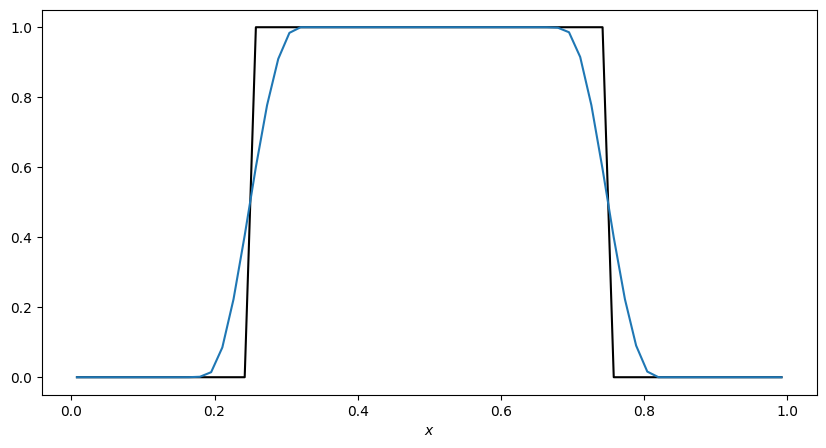

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
solver.plot_1d_slice(ax, "rho", x=None, t=0, color="black")
solver.plot_1d_slice(ax, "rho", x=None)

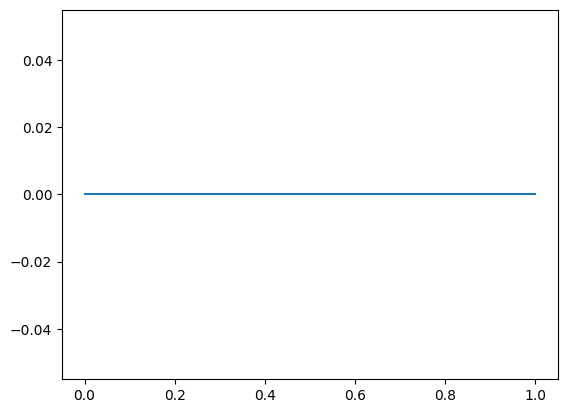

In [4]:
plt.plot(
    solver.minisnapshots["t"],
    np.minimum(
        np.array(solver.minisnapshots["min_rho"]) - 0,
        1 - np.array(solver.minisnapshots["max_rho"]),
    ),
)

In [5]:
euler_solver0 = EulerSolver(
    ic=initial_conditions.sod_shock_tube_1d,
    bcx="free",
    nx=2048,
    p=0,
)
euler_solver0.run(0.245)

{'P', 'vx', 'E', 'mx', 'rho'} 3
{'vy', 'vz', 'mz', 'my'} 2
{'P', 'mz', 'vx', 'E', 'vy', 'mx', 'rho', 'vz', 'my'} 5


100%|██████████| 0.245/0.245 [00:03]                


In [6]:
euler_solver = EulerSolver(
    ic=initial_conditions.sod_shock_tube_1d,
    bcx="free",
    nx=256,
    p=2,
    ZS=True,
    PAD={"rho": (0, np.inf)},
)
euler_solver.run(0.245)

{'P', 'vx', 'E', 'mx', 'rho'} 3
{'vy', 'vz', 'mz', 'my'} 2
{'P', 'mz', 'vx', 'E', 'vy', 'mx', 'rho', 'vz', 'my'} 5


100%|██████████| 0.245/0.245 [00:00]                


Text(0.5, 0, '$x$')

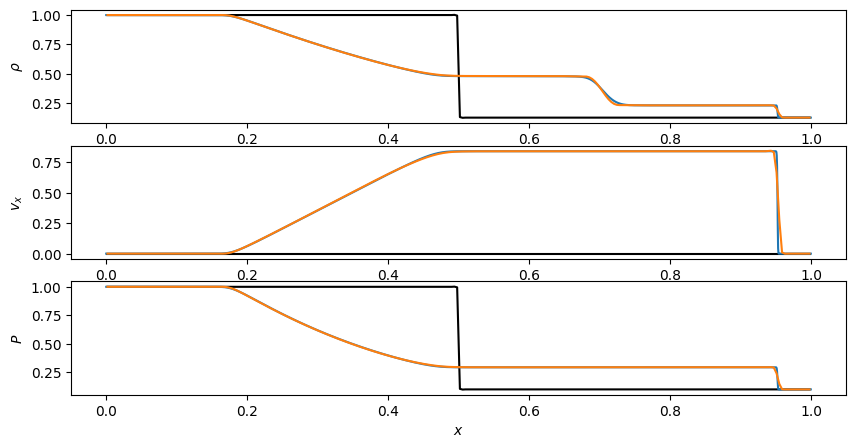

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(10, 5))
ax[0].set_ylabel(r"$\rho$")
euler_solver.plot_1d_slice(ax[0], "rho", array="w", x=None, t=0, color="black")
euler_solver0.plot_1d_slice(ax[0], "rho", array="w", x=None)
euler_solver.plot_1d_slice(ax[0], "rho", array="w", x=None)
ax[1].set_ylabel(r"$v_x$")
euler_solver.plot_1d_slice(ax[1], "vx", array="w", x=None, t=0, color="black")
euler_solver0.plot_1d_slice(ax[1], "vx", array="w", x=None)
euler_solver.plot_1d_slice(ax[1], "vx", array="w", x=None)
ax[2].set_ylabel(r"$P$")
euler_solver.plot_1d_slice(ax[2], "P", array="w", x=None, t=0, color="black")
euler_solver0.plot_1d_slice(ax[2], "P", array="w", x=None)
euler_solver.plot_1d_slice(ax[2], "P", array="w", x=None)
ax[2].set_xlabel(r"$x$")

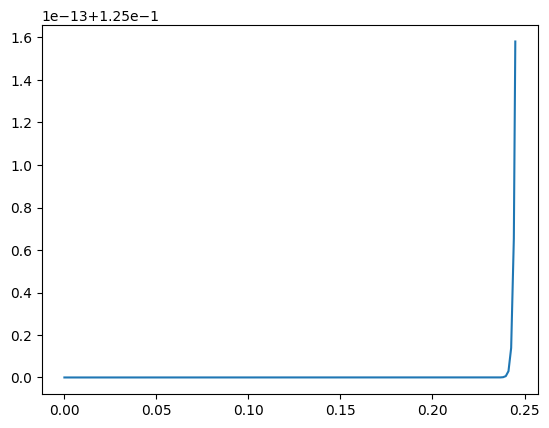

In [10]:
plt.plot(
    euler_solver.minisnapshots["t"], np.array(euler_solver.minisnapshots["min_rho"])
)